# Import
---


In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
---

[-3.08277386e-02  2.21246384e-01  1.75630483e-01  3.04970731e-01
  3.69325769e-01  3.72366848e-01  6.64845964e-01  7.05428952e-01
  7.49913921e-01  7.02155257e-01  9.00157713e-01  9.62709004e-01
  8.49155006e-01  8.34297764e-01  9.25048008e-01  1.02623018e+00
  1.03351092e+00  1.02358516e+00  1.01957876e+00  9.34656868e-01
  8.78068069e-01  8.10199426e-01  8.66369355e-01  6.76636699e-01
  7.35605099e-01  6.04536902e-01  5.33690185e-01  4.86415668e-01
  4.67299108e-01  2.37832031e-01 -4.73902763e-02  1.10276596e-01
  6.46288097e-02 -2.05157369e-01 -1.84757212e-01 -2.50988546e-01
 -4.90468735e-01 -5.66071502e-01 -5.82894467e-01 -7.58390215e-01
 -6.70248338e-01 -8.59222659e-01 -9.36109735e-01 -6.76964192e-01
 -8.56057686e-01 -9.73075431e-01 -1.05385572e+00 -1.00359772e+00
 -7.96380952e-01 -1.05438996e+00 -1.12623497e+00 -1.03136170e+00
 -1.05382119e+00 -7.13612668e-01 -8.50144839e-01 -6.06654326e-01
 -6.29803870e-01 -4.87693258e-01 -4.98537793e-01 -2.96110319e-01
 -4.46532560e-01 -1.60756

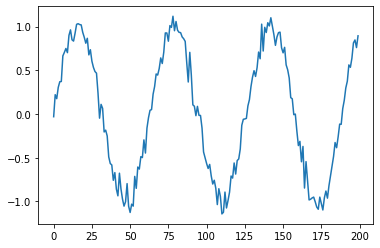

In [11]:
# Lets make the original data, a sentethic data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1  # for noise
print(series)
# Plot it
plt.plot(series)
plt.show()

In [12]:
# Build the dataset
# Lets see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)


(190, 10) (190,)


# Model
---

In [13]:
# Autoregressive Linear Model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
)

# Train the model
r = model.fit(X[:-N//2], Y[:-N//2],
              epochs=80,
              validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3744 - val_loss: 0.2077
Epoch 2/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1314 - val_loss: 0.0784
Epoch 3/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0841 - val_loss: 0.0315
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0562 - val_loss: 0.0661
Epoch 5/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0524 - val_loss: 0.0575
Epoch 6/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0605 - val_loss: 0.0663
Epoch 7/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0545 - val_loss: 0.0454
Epoch 8/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0249
Epoch 9/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0318 - val_loss: 0.0240
Epoch 10/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0274 - val_loss: 0.0307
Epoch 11/80
3/3 [=====================

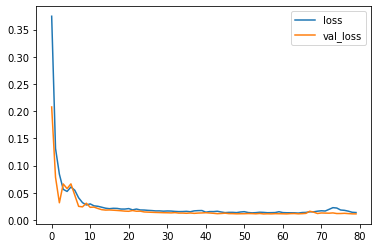

In [14]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [15]:
# "WRONG" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while(len(validation_predictions) < len(validation_target)):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

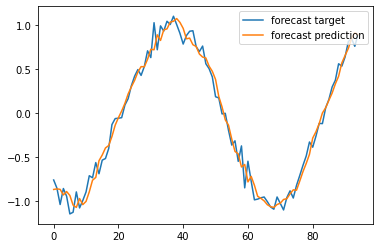

In [16]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [17]:
# Forecast future values (use only self predictions for making future preditcions)

validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2] # 1-D array of length T

while(len(validation_predictions) < len(validation_target)):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

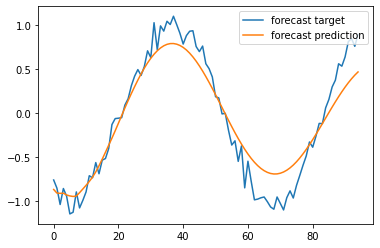

In [18]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()